In [ ]:
[단층퍼셉트론과 다층신경망의 비교] 단층은 선형/직선분류 만 분석가능하지만 다층은 비선형도 구분가능함
만약 선형함수로만 이루어진경우 다층신경망은 단층으로 만들수도 있음


In [ ]:
[활성화함수]
(항등함수): 다층에서는 못씀. 출력이 +-무한대 이지만 느림
(계단함수): 출력값이 0,1로 단순함, 미분값이 급격하게 변함, 대부분의 영역에서 미분값 0 -> 학습이 어려움
(임계논리함수):미분가능한 부분을 완화 시켰고, 출력값이 0,1사이로 단순
(시그모이드함수): 전구간에서 미분가능, 0,1사이에 수렴 => 학습에 매우 적합한 활성화함수임

In [ ]:
[활성화 함수에 따른 경사하강법]: 사용하는 함수마다 가중치 업데이트 식이 달라짐 
[역전파오류법]: 다층신경망은 출력에서 입력으로 거꾸로 올라가면서 w와 b를 계산함

In [2]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

sess=tf.compat.v1.Session()

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

1. xor 은닉층 1개를 추가해서 xor을 해결해보자 :은닉층 노드수가 적으면 계산량은 작아지지만 학습은 잘 되지않음, 노드수가 많으면 학습횟수가 적어짐(시간걸림)

In [7]:
#### 은닉층 노드수를 변경해보면서 결과를보자
learning_rate = 0.1

x_data = [[0, 0],       [0, 1],            [1, 0],         [1, 1]]  ##4*2
y_data = [[0],       [1],        [1],        [0]]  ## 두수가 같으면 0, 다르면 1인 xor

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)


### 버전문제로 placeholder안되서 준명령어
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(tf.float32, [None, 2]) ## x_data가 2열이니 , none*2
y = tf.placeholder(tf.float32, [None, 1])

### 은닉층 추가하기
#### 은닉층 노드수가 적으면 계산량은 작아지지만 학습은 잘 되지않음, 노드수가 많으면 학습횟수가 적어짐(시간걸림)
node = 5  ##  5, 2, 10

## 입력력층과 은닉층 사이의 w와 b(바이어스) 정의
w1 = tf.Variable(tf.random_normal([2, node])) ##행은 입력층의 노드의수 2 열은 은닉층의수5
b1 = tf.Variable(tf.random_normal([node])) ## 은닉층의 수만큼의 일차원 벡터 5
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1) ## none*5크기가 나옴

## 은닉층과 출력층 사이의 w와 b(바이어스) 정의
w2 = tf.Variable(tf.random_normal([node, 1])) ##이전 은닉층의 노드수 5 출력층의 노드의수 1
b2 = tf.Variable(tf.random_normal([1])) ## 출력층의 노드수 1
hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2) ## none*1

## cost함수는 이진분류문제라서 log함수사용
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  
## 오차최소를 위해 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

#  hypothesis = [[ 0.7  0.2  ] ]  ->     [ 0.7 > 0.5    0.2 >  0.5]   ->  [ true  false]     ->   [  1 0 ]
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

# [[1 0 ]]   == [[ 1  1] ]   ->   [[ true   false ] ] ->  [] [ 1  0] ] ->   [ 0.5 ]
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


sess.run(tf.global_variables_initializer())

for step in range(5001):  ## 최대학습횟수
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})  
        if a == 1.0 :  ## 정확도가 1되면 학습정지
            print(step+1, p.reshape(1,4), a, c) 
            break            
        if step % 500 == 0  :
            print(step+1, p.reshape(1,4), a, c) 
print("step" , step)
print("accuracy ", a)

## 결과를 보면 학습횟수가 674(즉673번) 학습했을때 0110나오고 정확도 1, cost 0.6518나옴

1 [[0. 0. 0. 0.]] 0.5 0.73938966
501 [[1. 1. 1. 0.]] 0.75 0.6699599
674 [[0. 1. 1. 0.]] 1.0 0.6518787
step 673
accuracy  1.0


  2. XOR 결정경계

0 [[0. 1. 0. 0.]] 0.75 0.68959314
500 [[0. 1. 1. 0.]] 1.0 0.40347156


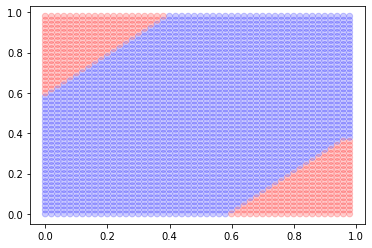

In [18]:
#노드수의 변화에 따라 학습이 어떻게 되는지 그래프로 봅시다
node = 10            ##  5 or 10
iteration = 1000   ## 500, 1000, 3000, 6000

learning_rate = 0.1

x_data = [[0, 0],       [0, 1],            [1, 0],         [1, 1]]
y_data = [[0],       [1],        [1],        [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

w1 = tf.Variable(tf.random_normal([2, node]))
b1 = tf.Variable(tf.random_normal([node]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([node, 1]))
b2 = tf.Variable(tf.random_normal([1]))
hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2)


cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


sess.run(tf.global_variables_initializer())

for step in range(iteration):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 500 == 0 :
            print(step, p.reshape(1,4), a, c) 
            
            
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor%d_%d.png' % (node, iteration))  ## 실행값들을 저장함
#print('xor%d_%d.png' % (node, iteration))
## 노드와 학습횟수를 바꿔서 실행할때마다 그래프가 달라지고 저장됨

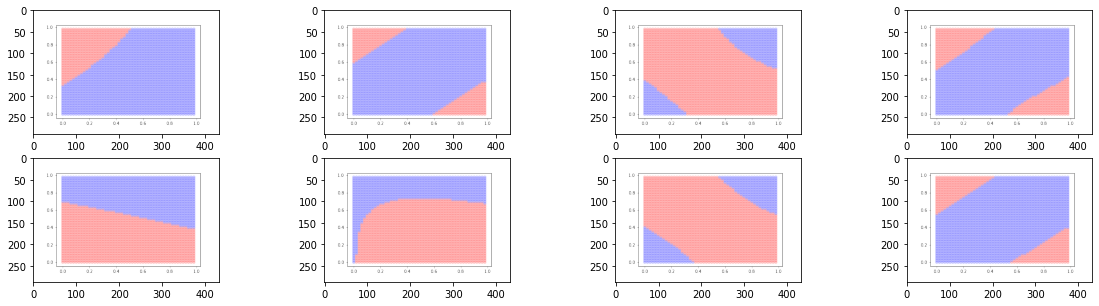

In [20]:
### 위에서 함수를써서, node와 학습횟수를 바꿔서 실행할때마다 이미지가 저장되게 했음
### 그 이미지들이 이제 등장
plt.figure(1, figsize=(20,5))        
plt.subplot(2,4,1)
img = mpimg.imread('xor10_500.png')
plt.imshow(img)
plt.subplot(2,4,2)
img = mpimg.imread('xor10_1000.png')
plt.imshow(img)
plt.subplot(2,4,3)
img = mpimg.imread('xor10_3000.png')
plt.imshow(img)
plt.subplot(2,4,4)
img = mpimg.imread('xor10_6000.png')
plt.imshow(img)
plt.subplot(2,4,5)
img = mpimg.imread('xor5_500.png')
plt.imshow(img)
plt.subplot(2,4,6)
img = mpimg.imread('xor5_1000.png')
plt.imshow(img)
plt.subplot(2,4,7)
img = mpimg.imread('xor5_3000.png')
plt.imshow(img)
plt.subplot(2,4,8)
img = mpimg.imread('xor5_6000.png')
plt.imshow(img)

## 그림을 보면 노드수가 많을때 학습이 잘되고, 학습횟수가 많아질수록 결정 경계면이
## 점점 정교해지는것을 알수 있음

2. xor 은닉층 2개를 추가해서 xor을 해결해보자(w1이외에 w2,w_0 가 만들어짐): 은닉층이 클수록 결정경계가 복잡해짐

1 [[1. 1. 1. 1.]] 0.5 1.0239602
501 [[0. 1. 1. 0.]] 1.0 0.63343394
1001 [[0. 1. 1. 0.]] 1.0 0.36908388
1501 [[0. 1. 1. 0.]] 1.0 0.09384902
2001 [[0. 1. 1. 0.]] 1.0 0.037556797
2501 [[0. 1. 1. 0.]] 1.0 0.021292912
3001 [[0. 1. 1. 0.]] 1.0 0.014301596
step 3000
accuracy 1.0


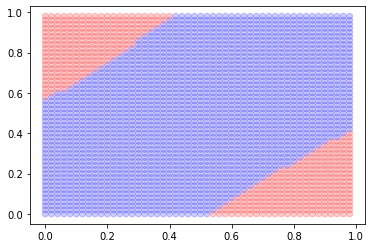

In [21]:
input = 2
node_1 = 10
w1 = tf.Variable(tf.random_normal([input, node_1])) ##행input수*열 node수
b1 = tf.Variable(tf.random_normal([node_1])) ## 노드수
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

node_2 = 10
w2 = tf.Variable(tf.random_normal([node_1, node_2]))  ##행 w1의 노드*열 node2
b2 = tf.Variable(tf.random_normal([node_2])) ##node2
layer2 = tf.sigmoid(tf.matmul(layer1, w2) + b2)

output = 1
w_o = tf.Variable(tf.random_normal([node_2, output]))
b_o = tf.Variable(tf.random_normal([output]))
hypothesis = tf.sigmoid(tf.matmul(layer2, w_o) + b_o)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(3001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 500 == 0 :
            print(step+1, p.reshape(1,4), a, c) 

xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)
            
print("step" , step)
print("accuracy", a)

은닉층이 3개인경우(시간이 많이 걸리고 코드가 길어짐)

0 [[1. 1. 1. 1.]] 0.5 1.4059006
500 [[0. 1. 0. 0.]] 0.75 0.6266367
1000 [[0. 1. 1. 0.]] 1.0 0.21274441
1500 [[0. 1. 1. 0.]] 1.0 0.04399048
2000 [[0. 1. 1. 0.]] 1.0 0.019342748
2500 [[0. 1. 1. 0.]] 1.0 0.011610656
3000 [[0. 1. 1. 0.]] 1.0 0.008073758


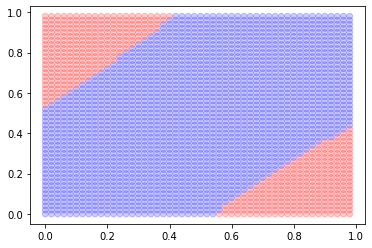

In [24]:
input = 2
hidden_1 = 10
w1 = tf.Variable(tf.random_normal([input, hidden_1]))
b1 = tf.Variable(tf.random_normal([hidden_1]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

hidden_2 = 10
w2 = tf.Variable(tf.random_normal([hidden_1, hidden_2]))
b2 = tf.Variable(tf.random_normal([hidden_2]))
layer2 = tf.sigmoid(tf.matmul(layer1, w2) + b2)

hidden_3 = 10
w3 = tf.Variable(tf.random_normal([hidden_2, hidden_3]))
b3 = tf.Variable(tf.random_normal([hidden_3]))
layer3 = tf.sigmoid(tf.matmul(layer2, w3) + b3)

output = 1
w_o = tf.Variable(tf.random_normal([hidden_3, output]))
b_o = tf.Variable(tf.random_normal([output]))
hypothesis = tf.sigmoid(tf.matmul(layer3, w_o) + b_o)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(3001):
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 500 == 0 :
            print(step, p.reshape(1,4), a, c) 

xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.ravel(), yy.ravel()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

다층신경망을 쉽게 구현하려고 addLayer함수 등장

In [26]:
def addLayer(x, node) :    ## 은닉층x와 해당층의node수
    input = x.shape.as_list()[1]
    w = tf.Variable(tf.random_normal([input, node])) ## 인덱스열이 입력값
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b) 
    return layer

## 은닉층이 4개이고 각각에서 node가 5,10,10,5,인경우
layer_1 = addLayer(x, 5)
layer_2 = addLayer(layer_1, 10)
layer_3 = addLayer(layer_2, 10)
layer_4 = addLayer(layer_3, 5)
hypothesis = addLayer(layer_4, 1)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


sess.run(tf.global_variables_initializer())

for step in range(6001):
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if step % 1000 == 0 :
            print(step, p.reshape(1,4), a, c) 

0 [[1. 1. 1. 1.]] 0.5 0.7033383
1000 [[1. 0. 1. 0.]] 0.5 0.6929973
2000 [[0. 1. 1. 0.]] 1.0 0.6923732
3000 [[0. 1. 0. 0.]] 0.75 0.6914863
4000 [[0. 1. 0. 1.]] 0.5 0.6892319
5000 [[0. 1. 0. 1.]] 0.5 0.67399246
6000 [[0. 1. 1. 0.]] 1.0 0.12695797
